In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# let us set random seed
np.random.seed(42)

# Define the number of samples - 100
num_samples = 100

# Generate the synthetic data
carbon_emission = np.random.uniform(50, 400, num_samples) # Emissions in hypothetical units
renewability_index = np.random.uniform(0, 1, num_samples) # Index from 0 (non-renewable) to 1(renewable)
energy_output = np.random.uniform(100, 1000, num_samples) # Energy Output
cost_efficiency = np.random.uniform(0.5, 5, num_samples) 

# Generating a binary target variable based n a conditon
sustainability = [
    1 if (emission <200 and renewability > 0.5 and cost < 3) else 0
    for emission, renewability, cost in zip(carbon_emission,renewability_index,cost_efficiency)
]

# Create dataframe
df = pd.DataFrame({
    'carbon_emission': carbon_emission,
    'renewability_index': renewability_index,
    'energy_output': energy_output,
    'cost_efficiency': cost_efficiency,
    'sustainability': sustainability
})

In [17]:
# Display the first 5 Rows and last 5 Columns
print(df.head())
print(df.tail())

   carbon_emission  renewability_index  energy_output  cost_efficiency  \
0       181.089042            0.031429     677.828482         0.732568   
1       382.750007            0.636410     175.725968         2.891096   
2       306.197880            0.314356     245.465843         2.932858   
3       259.530469            0.508571     908.698770         3.368435   
4       104.606524            0.907566     645.786154         3.767411   

   sustainability  
0               0  
1               0  
2               0  
3               0  
4               0  
    carbon_emission  renewability_index  energy_output  cost_efficiency  \
95       222.828459            0.349210     570.018934         4.688408   
96       232.956490            0.725956     792.994198         4.362857   
97       199.639356            0.897110     294.238925         2.430473   
98        58.896694            0.887086     660.601428         3.878920   
99        87.761999            0.779876     176.812718      

In [18]:
df.isnull().sum()  # if missing value present, use df = df.fillna(df.mean())

carbon_emission       0
renewability_index    0
energy_output         0
cost_efficiency       0
sustainability        0
dtype: int64

In [19]:
# Feature Selection
X = df[['carbon_emission','energy_output','renewability_index','cost_efficiency']]   # Features
y = df['sustainability']   # Target

In [20]:
# tarin and tesst sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8,random_state=42)

In [21]:
X_train.shape

(80, 4)

In [22]:
X_test.shape

(20, 4)

In [23]:
# Taining the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [25]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f'Sccuracy Score is {acc}')

Sccuracy Score is 0.95


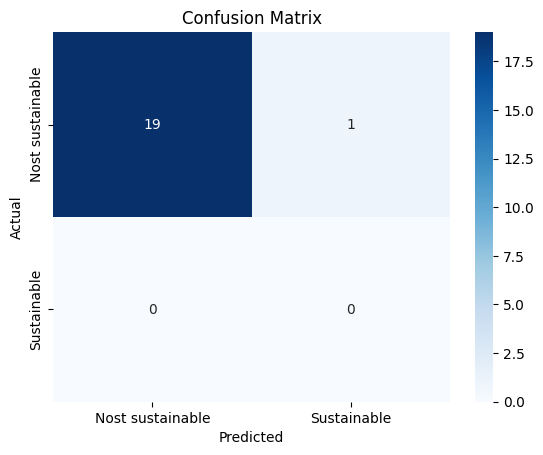

In [28]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Nost sustainable', 'Sustainable'],
           yticklabels=['Nost sustainable', 'Sustainable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Classification Report
print(classification_report(y_test,y_pred, target_names=['Nost sustainable', 'Sustainable']))

                  precision    recall  f1-score   support

Nost sustainable       1.00      0.95      0.97        20
     Sustainable       0.00      0.00      0.00         0

        accuracy                           0.95        20
       macro avg       0.50      0.47      0.49        20
    weighted avg       1.00      0.95      0.97        20



C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [30]:
# Feature importance
coef = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coef

,Coefficient
carbon_emission,-0.013189
energy_output,0.001610
renewability_index,1.344090
cost_efficiency,-0.584978


In [31]:
# Model Deployment
import joblib
joblib.dump(model, 'LogRegSustainable.pkl')

['LogRegSustainable.pkl']